In [51]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark import SparkConf

In [ ]:
conf = SparkConf().setMaster("local[*]").set("spark.executer.memory", "2g")

sc = SparkContext(conf=conf)
spark = SparkSession(sc).builder.getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

In [53]:
reviews = spark.read.format("csv").option("header", "true").option("multiline","true").load("reviews/yelp_reviews_cleaned.csv")
reviews.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- cool: string (nullable = true)
 |-- clean_text_column: string (nullable = true)



In [54]:
users = spark.read.format("csv").option("header", "true").option("multiline","true").load("users/yelp_users_cleaned.csv")
users = users.withColumnRenamed("useful", "user_useful")
users = users.withColumnRenamed("funny", "user_funny")
users = users.withColumnRenamed("cool", "user_cool")
users.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- friends: string (nullable = true)
 |-- user_useful: string (nullable = true)
 |-- user_funny: string (nullable = true)
 |-- user_cool: string (nullable = true)
 |-- fans: string (nullable = true)
 |-- elite: string (nullable = true)
 |-- average_stars: string (nullable = true)
 |-- compliment_hot: string (nullable = true)
 |-- compliment_more: string (nullable = true)
 |-- compliment_profile: string (nullable = true)
 |-- compliment_cute: string (nullable = true)
 |-- compliment_list: string (nullable = true)
 |-- compliment_note: string (nullable = true)
 |-- compliment_plain: string (nullable = true)
 |-- compliment_cool: string (nullable = true)
 |-- compliment_funny: string (nullable = true)
 |-- compliment_writer: string (nullable = true)
 |-- compliment_photos: string (nullable = true)
 |-- elite_flag: string

In [55]:
merged_df = reviews.join(users, "user_id", "left")

In [56]:
merged_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- cool: string (nullable = true)
 |-- clean_text_column: string (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- friends: string (nullable = true)
 |-- user_useful: string (nullable = true)
 |-- user_funny: string (nullable = true)
 |-- user_cool: string (nullable = true)
 |-- fans: string (nullable = true)
 |-- elite: string (nullable = true)
 |-- average_stars: string (nullable = true)
 |-- compliment_hot: string (nullable = true)
 |-- compliment_more: string (nullable = true)
 |-- compliment_profile: string (nullable = true)
 |-- compliment_cute: string (nullable = true)
 |-- 

In [57]:
# Rename the column clean_text_column to clean_review
merged_df = merged_df.withColumnRenamed("clean_text_column", "clean_review")
merged_df = merged_df.na.drop(subset=["elite_flag"])

# Exploratory Data Analysis

In [9]:
# Assuming merged_df is already defined
# Select distinct values from the 'elite_flag' column
unique_elite_flags = merged_df.select('elite_flag').distinct()

# Show the unique values
unique_elite_flags.show()

+----------+
|elite_flag|
+----------+
|         0|
|         1|
+----------+



In [58]:
# Filter merged_df to create elites DataFrame
elites = merged_df.filter(merged_df['elite_flag'] == 1)

# Filter merged_df to create nonelites DataFrame
nonelites = merged_df.filter(merged_df['elite_flag'] == 0)

In [10]:
# Show the shape of the DataFrames
print("Shape of elites DataFrame:", (elites.count(), len(elites.columns)))
print("Shape of nonelites DataFrame:", (nonelites.count(), len(nonelites.columns)))

Shape of elites DataFrame: (1253052, 32)


Shape of nonelites DataFrame: (4008610, 32)


In [10]:
elites.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- cool: string (nullable = true)
 |-- clean_review: string (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- friends: string (nullable = true)
 |-- user_useful: string (nullable = true)
 |-- user_funny: string (nullable = true)
 |-- user_cool: string (nullable = true)
 |-- fans: string (nullable = true)
 |-- elite: string (nullable = true)
 |-- average_stars: string (nullable = true)
 |-- compliment_hot: string (nullable = true)
 |-- compliment_more: string (nullable = true)
 |-- compliment_profile: string (nullable = true)
 |-- compliment_cute: string (nullable = true)
 |-- compl

In [11]:
nonelites.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- cool: string (nullable = true)
 |-- clean_review: string (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- friends: string (nullable = true)
 |-- user_useful: string (nullable = true)
 |-- user_funny: string (nullable = true)
 |-- user_cool: string (nullable = true)
 |-- fans: string (nullable = true)
 |-- elite: string (nullable = true)
 |-- average_stars: string (nullable = true)
 |-- compliment_hot: string (nullable = true)
 |-- compliment_more: string (nullable = true)
 |-- compliment_profile: string (nullable = true)
 |-- compliment_cute: string (nullable = true)
 |-- compl

In [ ]:
### Analyzing compliments and 

In [61]:
from pyspark.sql.functions import col, avg

# Convert string columns to integer
string_columns = ["useful", "funny", "cool", "user_useful", "user_funny", "user_cool",
                  "compliment_hot", "compliment_more", "compliment_profile", "compliment_cute",
                  "compliment_list", "compliment_note", "compliment_plain", "compliment_cool",
                  "compliment_funny", "compliment_writer", "compliment_photos"]

for column in string_columns:
    elites = elites.withColumn(column, col(column).cast("int"))
    nonelites = nonelites.withColumn(column, col(column).cast("int"))

# Calculate averages for elites
elites_avg = elites.agg(*(avg(col(c)).alias(c) for c in string_columns))

# Calculate averages for nonelites
nonelites_avg = nonelites.agg(*(avg(col(c)).alias(c) for c in string_columns))

# Show the averages and median values
print("Elites Averages")
elites_avg.show()
print("Non-Elites Averages")
nonelites_avg.show()

Elites Averages


+-----------------+------------------+------------------+------------------+----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-----------------+
|           useful|             funny|              cool|       user_useful|      user_funny|        user_cool|    compliment_hot|   compliment_more|compliment_profile|  compliment_cute|  compliment_list|  compliment_note|  compliment_plain|   compliment_cool|  compliment_funny| compliment_writer|compliment_photos|
+-----------------+------------------+------------------+------------------+----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-----------------+
|2.329457265694445|1.0485329789249591|1.410496293

+------------------+-------------------+------------------+----------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+-------------------+------------------+----------------+------------------+------------------+------------------+------------------+
|            useful|              funny|              cool|     user_useful|       user_funny|        user_cool|    compliment_hot|    compliment_more|compliment_profile|   compliment_cute|    compliment_list|   compliment_note|compliment_plain|   compliment_cool|  compliment_funny| compliment_writer| compliment_photos|
+------------------+-------------------+------------------+----------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+-------------------+------------------+----------------+------------------+------------------+------------------+------------------+
|0.9315747030272644|0.272831201595

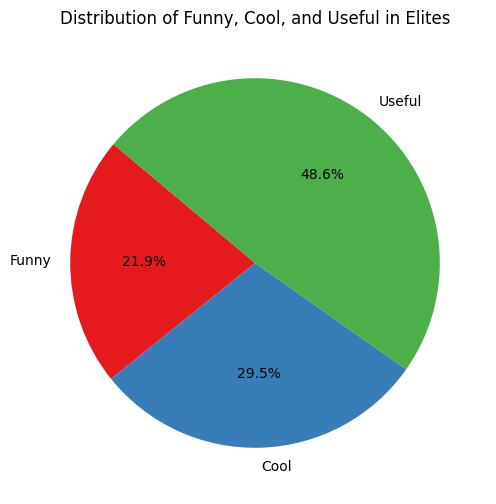

In [29]:
import matplotlib.pyplot as plt
from matplotlib.cm import Set1

# Extract values from elites_avg DataFrame
values = elites_avg.select("funny", "cool", "useful").collect()[0]

# Define labels for the pie chart
labels = ["Funny", "Cool", "Useful"]

# Define colors using Set1 colormap
colors = Set1.colors[:len(values)]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Funny, Cool, and Useful in Elites')
plt.show()


Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.net.PlainSocketImpl.socketAccept(Native Method)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:409)
	at java.net.ServerSocket.implAccept(ServerSocket.java:560)
	at java.net.ServerSocket.accept(ServerSocket.java:528)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:58)


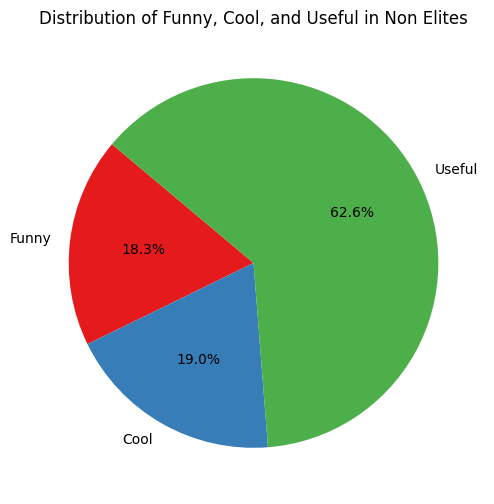

In [31]:
import matplotlib.pyplot as plt
from matplotlib.cm import Set1

# Extract values from elites_avg DataFrame
values = nonelites_avg.select("funny", "cool", "useful").collect()[0]

# Define labels for the pie chart
labels = ["Funny", "Cool", "Useful"]

# Define colors using Set1 colormap
colors = Set1.colors[:len(values)]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Funny, Cool, and Useful in Non Elites')
plt.show()

Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.net.PlainSocketImpl.socketAccept(Native Method)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:409)
	at java.net.ServerSocket.implAccept(ServerSocket.java:560)
	at java.net.ServerSocket.accept(ServerSocket.java:528)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:58)


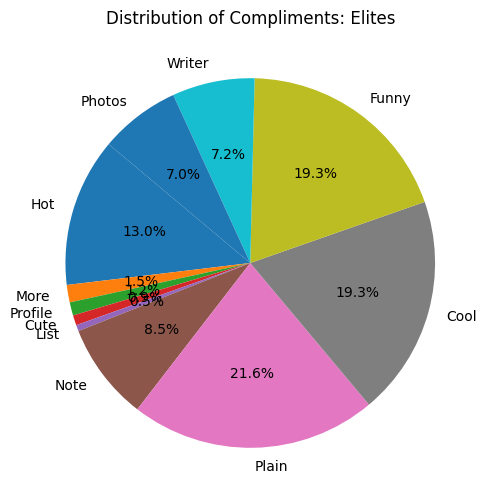

In [35]:
import matplotlib.pyplot as plt

# Get compliment column names
compliment_columns = [c for c in elites_avg.columns if c.startswith('compliment_')]

# Extract values from elites_avg DataFrame
values = [elites_avg.select(col).collect()[0][0] for col in compliment_columns]

# Define labels for the pie chart
labels = [col.replace("compliment_", "").capitalize() for col in compliment_columns]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Compliments: Elites')
plt.show()


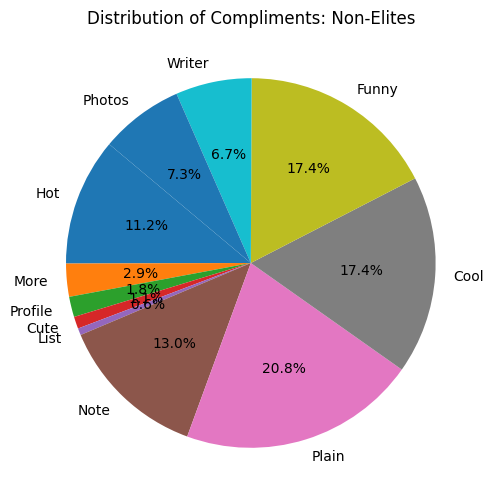

In [36]:
import matplotlib.pyplot as plt

# Get compliment column names
compliment_columns = [c for c in elites_avg.columns if c.startswith('compliment_')]

# Extract values from elites_avg DataFrame
values = [nonelites_avg.select(col).collect()[0][0] for col in compliment_columns]

# Define labels for the pie chart
labels = [col.replace("compliment_", "").capitalize() for col in compliment_columns]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Compliments: Non-Elites')
plt.show()

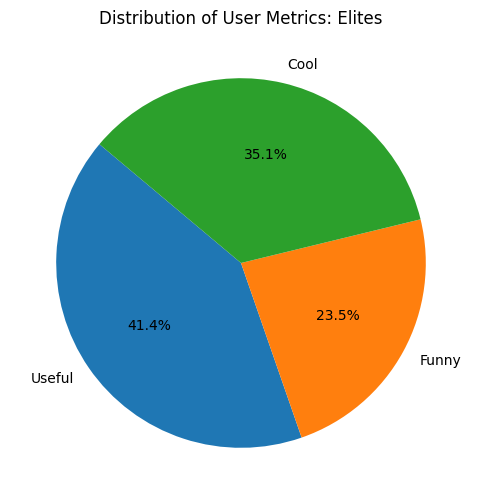

In [37]:
import matplotlib.pyplot as plt

# Get user-related column names
user_columns = [c for c in elites_avg.columns if c.startswith('user_')]

# Extract values from elites_avg DataFrame
values = [elites_avg.select(col).collect()[0][0] for col in user_columns]

# Define labels for the pie chart
labels = [col.replace("user_", "").capitalize() for col in user_columns]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of User Metrics: Elites')
plt.show()


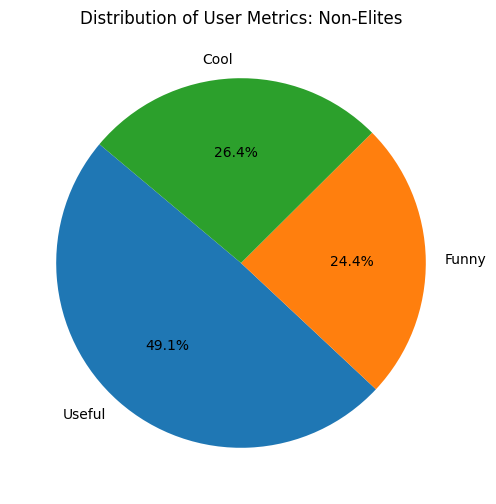

In [38]:
import matplotlib.pyplot as plt

# Get user-related column names
user_columns = [c for c in elites_avg.columns if c.startswith('user_')]

# Extract values from elites_avg DataFrame
values = [nonelites_avg.select(col).collect()[0][0] for col in user_columns]

# Define labels for the pie chart
labels = [col.replace("user_", "").capitalize() for col in user_columns]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of User Metrics: Non-Elites')
plt.show()

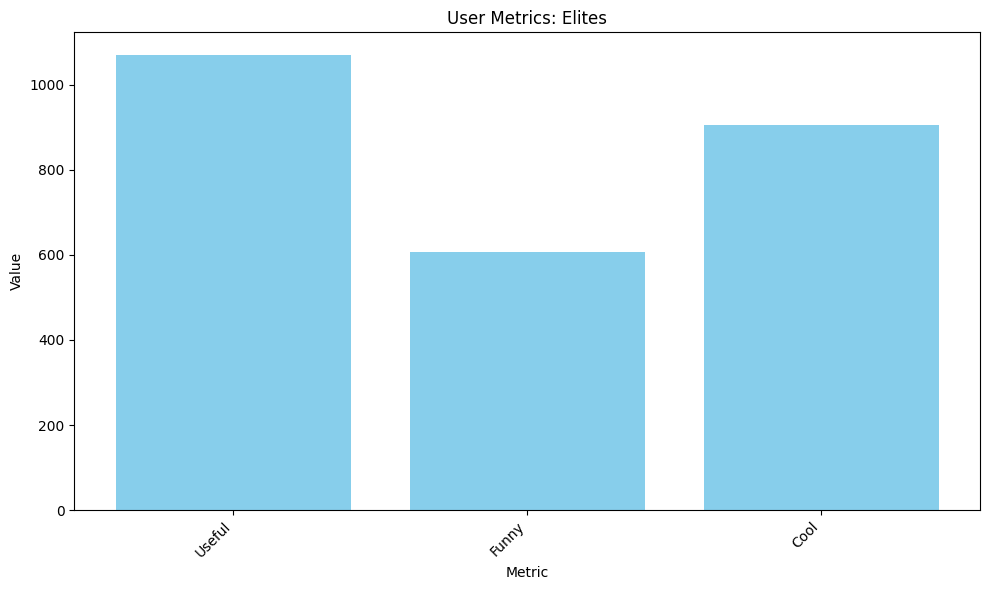

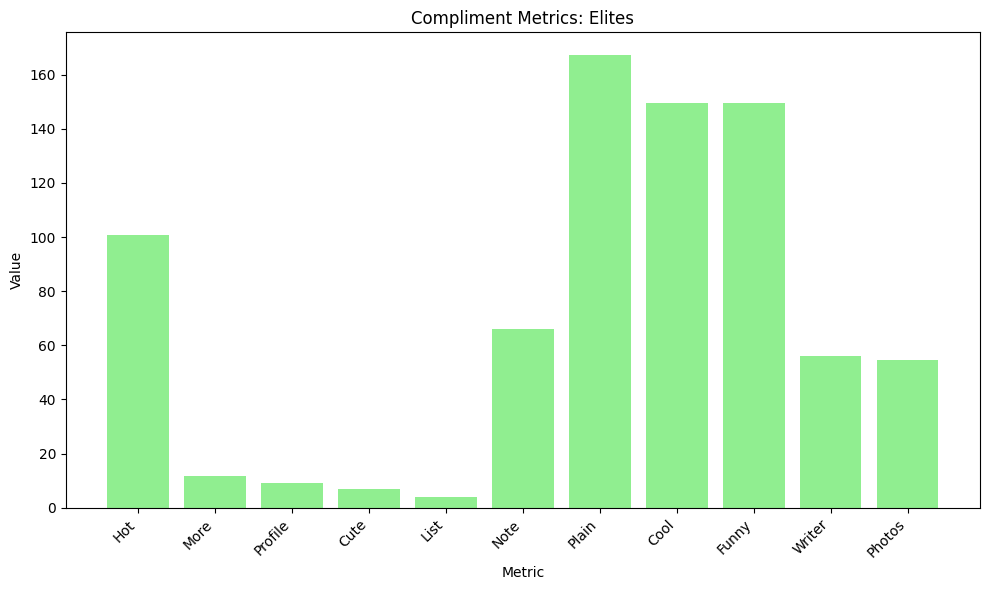

In [40]:
import matplotlib.pyplot as plt

# Get user-related column names
user_columns = [c for c in elites_avg.columns if c.startswith('user_')]

# Extract values from elites_avg DataFrame
user_values = [elites_avg.select(col).collect()[0][0] for col in user_columns]

# Define labels for the bar chart
user_labels = [col.replace("user_", "").capitalize() for col in user_columns]

# Create a bar chart for user-related columns
plt.figure(figsize=(10, 6))
plt.bar(user_labels, user_values, color='skyblue')
plt.title('User Metrics: Elites')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Get compliment column names
compliment_columns = [c for c in elites_avg.columns if c.startswith('compliment_')]

# Extract values from elites_avg DataFrame
compliment_values = [elites_avg.select(col).collect()[0][0] for col in compliment_columns]

# Define labels for the bar chart
compliment_labels = [col.replace("compliment_", "").capitalize() for col in compliment_columns]

# Create a bar chart for compliment-related columns
plt.figure(figsize=(10, 6))
plt.bar(compliment_labels, compliment_values, color='lightgreen')
plt.title('Compliment Metrics: Elites')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


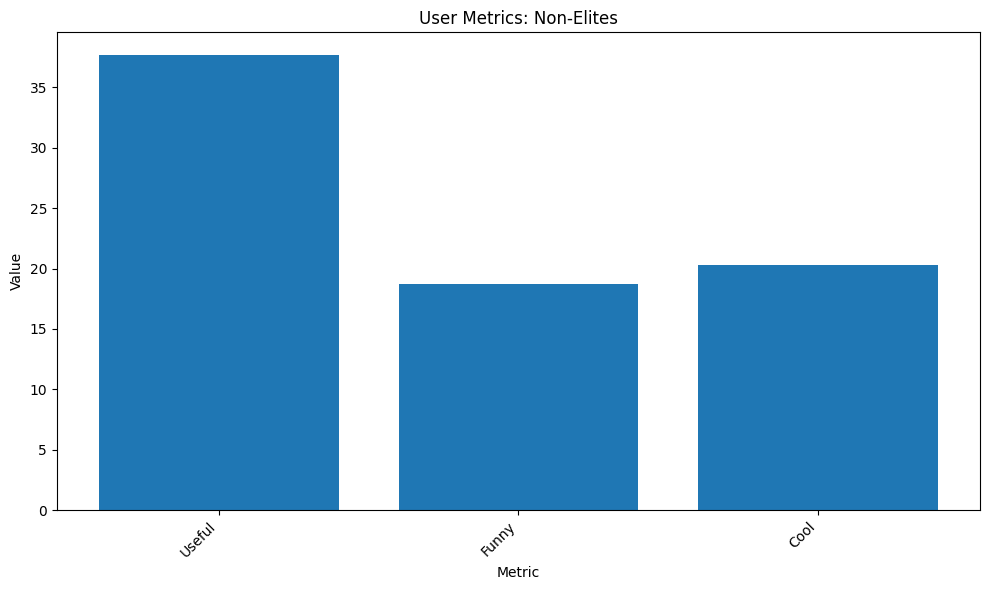

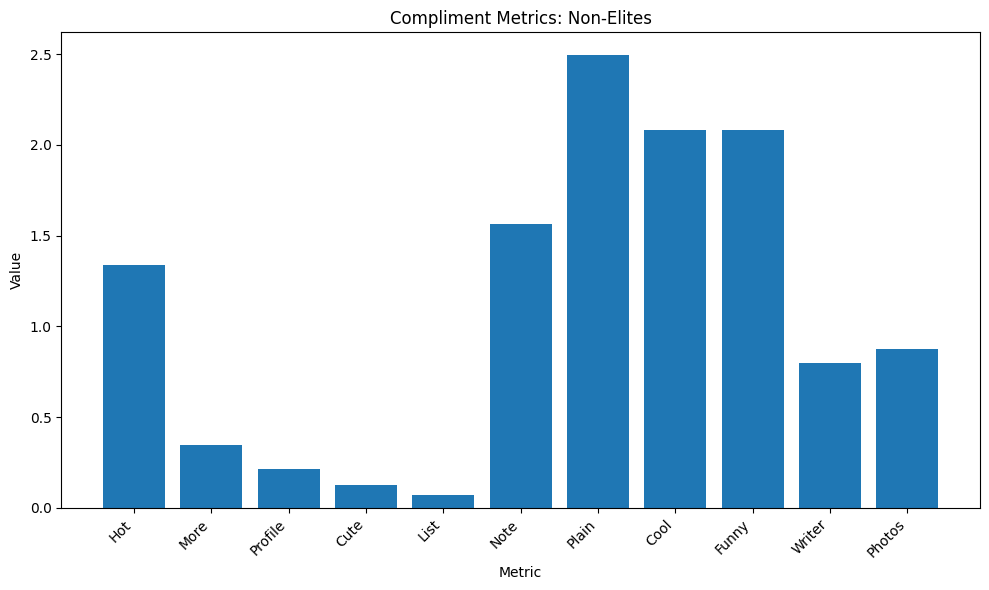

In [41]:
import matplotlib.pyplot as plt

# Get user-related column names
user_columns = [c for c in nonelites_avg.columns if c.startswith('user_')]

# Extract values from elites_avg DataFrame
user_values = [nonelites_avg.select(col).collect()[0][0] for col in user_columns]

# Define labels for the bar chart
user_labels = [col.replace("user_", "").capitalize() for col in user_columns]

# Create a bar chart for user-related columns
plt.figure(figsize=(10, 6))
plt.bar(user_labels, user_values)
plt.title('User Metrics: Non-Elites')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Get compliment column names
compliment_columns = [c for c in nonelites_avg.columns if c.startswith('compliment_')]

# Extract values from elites_avg DataFrame
compliment_values = [nonelites_avg.select(col).collect()[0][0] for col in compliment_columns]

# Define labels for the bar chart
compliment_labels = [col.replace("compliment_", "").capitalize() for col in compliment_columns]

# Create a bar chart for compliment-related columns
plt.figure(figsize=(10, 6))
plt.bar(compliment_labels, compliment_values)
plt.title('Compliment Metrics: Non-Elites')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
# Calculate average value of "fans" for elites
elites_avg_fans = elites.agg({"fans": "avg"}).collect()[0][0]

# Calculate average value of "fans" for non-elites
nonelites_avg_fans = nonelites.agg({"fans": "avg"}).collect()[0][0]

print("Average number of fans for elites:", elites_avg_fans)
print("Average number of fans for non-elites:", nonelites_avg_fans)


Average number of fans for elites: 41.956583605468886
Average number of fans for non-elites: 1.3199894726600991


In [43]:
# Calculate average value of "friends" for elites
elites_avg_friends = elites.agg({"friends": "avg"}).collect()[0][0]

# Calculate average value of "friends" for non-elites
nonelites_avg_friends = nonelites.agg({"friends": "avg"}).collect()[0][0]

print("Average number of friends for elites:", elites_avg_friends)
print("Average number of friends for non-elites:", nonelites_avg_friends)


Average number of friends for elites: None
Average number of friends for non-elites: None


In [44]:
# Calculate average value of "stars" for elites
elites_avg_stars = elites.agg({"stars": "avg"}).collect()[0][0]

# Calculate average value of "stars" for non-elites
nonelites_avg_stars = nonelites.agg({"stars": "avg"}).collect()[0][0]

print("Average number of stars for elites:", elites_avg_stars)
print("Average number of stars for non-elites:", nonelites_avg_stars)


Average number of stars for elites: 3.785149379275561
Average number of stars for non-elites: 3.7097924218120495


In [45]:
# Calculate average value of "stars" for elites
elites_avg_stars = elites.agg({"average_stars": "avg"}).collect()[0][0]

# Calculate average value of "stars" for non-elites
nonelites_avg_stars = nonelites.agg({"average_stars": "avg"}).collect()[0][0]

print("Average number of stars for elite users:", elites_avg_stars)
print("Average number of stars for non-elite users:", nonelites_avg_stars)

Average number of stars for elite users: 3.8084275752323142
Average number of stars for non-elite users: 3.7150810480440715


In [46]:
# Calculate average value of "review_count" for elites
elites_avg_review_count = elites.agg({"review_count": "avg"}).collect()[0][0]

# Calculate average value of "review_count" for non-elites
nonelites_avg_review_count = nonelites.agg({"review_count": "avg"}).collect()[0][0]

print("Average review count for elites:", elites_avg_review_count)
print("Average review count for non-elites:", nonelites_avg_review_count)


Average review count for elites: 393.646373015645
Average review count for non-elites: 36.62662344303886


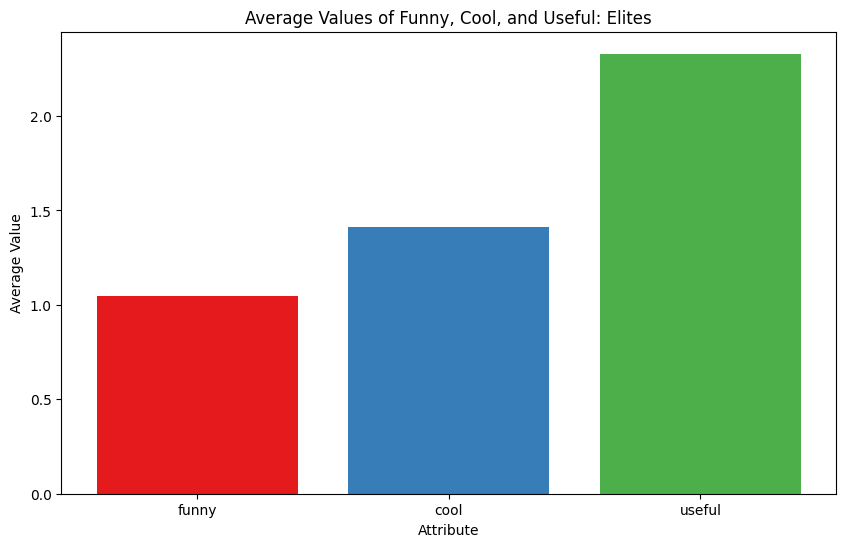

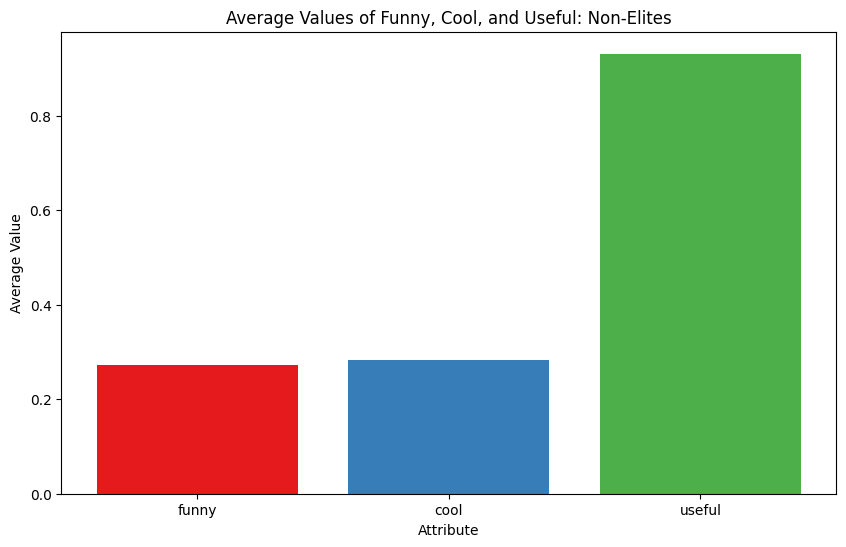

In [47]:
import matplotlib.pyplot as plt

# Define the attributes
attributes = ["funny", "cool", "useful"]

# Extract values from elites_avg DataFrame
values = [elites_avg.select(attr).collect()[0][0] for attr in attributes]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(attributes, values, color=colors)
plt.title('Average Values of Funny, Cool, and Useful: Elites')
plt.xlabel('Attribute')
plt.ylabel('Average Value')
plt.show()

# Extract values from elites_avg DataFrame
values = [nonelites_avg.select(attr).collect()[0][0] for attr in attributes]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(attributes, values, color=colors)
plt.title('Average Values of Funny, Cool, and Useful: Non-Elites')
plt.xlabel('Attribute')
plt.ylabel('Average Value')
plt.show()

In [65]:
from pyspark.sql.functions import col

# Create a combined metric for elites
elites = elites.withColumn("sum_funny", col("funny") + col("user_funny") + col("compliment_funny"))

# Create a combined metric for nonelites
nonelites = nonelites.withColumn("sum_funny", col("funny") + col("user_funny") + col("compliment_funny"))

# Display the updated DataFrame schemas
elites.printSchema()
nonelites.printSchema()


root
 |-- user_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: integer (nullable = true)
 |-- funny: integer (nullable = true)
 |-- cool: integer (nullable = true)
 |-- clean_review: string (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- friends: string (nullable = true)
 |-- user_useful: integer (nullable = true)
 |-- user_funny: integer (nullable = true)
 |-- user_cool: integer (nullable = true)
 |-- fans: string (nullable = true)
 |-- elite: string (nullable = true)
 |-- average_stars: string (nullable = true)
 |-- compliment_hot: integer (nullable = true)
 |-- compliment_more: integer (nullable = true)
 |-- compliment_profile: integer (nullable = true)
 |-- compliment_cute: integer (nullable = true)


In [63]:
from pyspark.sql.functions import col

# Create a combined metric for elites
elites = elites.withColumn("sum_cool", col("cool") + col("user_cool") + col("compliment_cool"))

# Create a combined metric for nonelites
nonelites = nonelites.withColumn("sum_cool", col("cool") + col("user_cool") + col("compliment_cool"))

# Display the updated DataFrame schemas
elites.printSchema()
nonelites.printSchema()


root
 |-- user_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: integer (nullable = true)
 |-- funny: integer (nullable = true)
 |-- cool: integer (nullable = true)
 |-- clean_review: string (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- friends: string (nullable = true)
 |-- user_useful: integer (nullable = true)
 |-- user_funny: integer (nullable = true)
 |-- user_cool: integer (nullable = true)
 |-- fans: string (nullable = true)
 |-- elite: string (nullable = true)
 |-- average_stars: string (nullable = true)
 |-- compliment_hot: integer (nullable = true)
 |-- compliment_more: integer (nullable = true)
 |-- compliment_profile: integer (nullable = true)
 |-- compliment_cute: integer (nullable = true)


In [66]:
from pyspark.sql.functions import avg

# Calculate average values of sum_funny and sum_cool for elites
elites_avg_sum_funny = elites.agg(avg(col("sum_funny"))).collect()[0][0]
elites_avg_sum_cool = elites.agg(avg(col("sum_cool"))).collect()[0][0]

# Calculate average values of sum_funny and sum_cool for nonelites
nonelites_avg_sum_funny = nonelites.agg(avg(col("sum_funny"))).collect()[0][0]
nonelites_avg_sum_cool = nonelites.agg(avg(col("sum_cool"))).collect()[0][0]

# Add average values to the averaged DataFrames
# elites_avg = elites_avg.withColumn("avg_sum_funny", elites_avg_sum_funny)
# elites_avg = elites_avg.withColumn("avg_sum_cool", elites_avg_sum_cool)

# nonelites_avg = nonelites_avg.withColumn("avg_sum_funny", nonelites_avg_sum_funny)
# nonelites_avg = nonelites_avg.withColumn("avg_sum_cool", nonelites_avg_sum_cool)

# # Display the updated DataFrames
# elites_avg.show()
# nonelites_avg.show()
print("Elites Funny Avg: {0} \nNonelites funny avg:{1}\n Elites Cook avg: {2}\n Non Elites avg:{3}".format(elites_avg_sum_funny, nonelites_avg_sum_funny,elites_avg_sum_cool, nonelites_avg_sum_cool ))

Elites Funny Avg: 667.1727778156286 
Nonelites funny avg:18.725291275075335
 Elites Cook avg: 932.3236815907486
 Non Elites avg:20.165413370039325


In [67]:
from pyspark.sql.functions import countDistinct

# Distinct count of user_id for elites
elites_distinct_count = elites.select(countDistinct("user_id")).collect()[0][0]

# Distinct count of user_id for nonelites
nonelites_distinct_count = nonelites.select(countDistinct("user_id")).collect()[0][0]

print("Distinct count of user_id for elites:", elites_distinct_count)
print("Distinct count of user_id for nonelites:", nonelites_distinct_count)


Distinct count of user_id for elites: 60818
Distinct count of user_id for nonelites: 1265282
